In [1]:
from env import make_env

In [2]:
import matplotlib.pyplot as plt

In [3]:
env = make_env('cpu', 3)

/home/yoosoo/anaconda3/envs/mujoco/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
env.show_cube = True

In [5]:
env.init_state()

<Figure size 800x800 with 0 Axes>

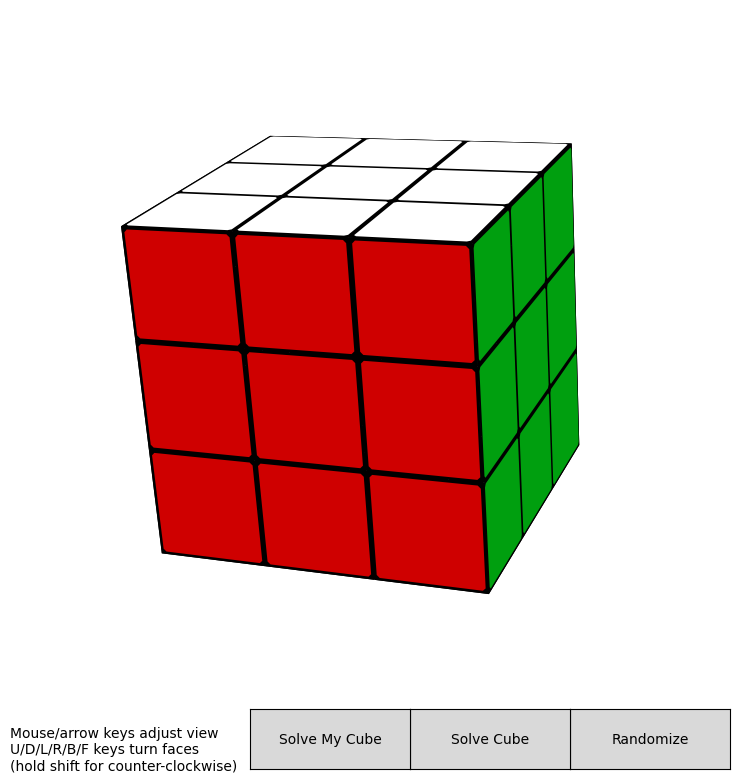

In [6]:
env.fig

In [7]:
env.reset()

<Figure size 800x800 with 0 Axes>

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

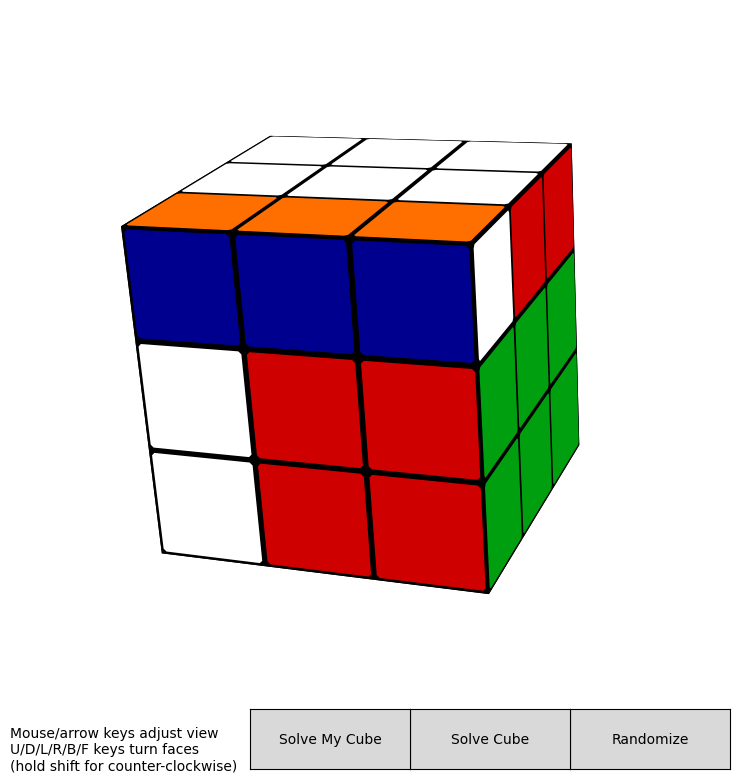

In [8]:
env.fig

In [29]:
from pycuber import *

def isSolved(sim_cube):
    solved = True
    if sim_cube.D == [[Square(sim_cube["D"].colour)] * 3] * 3:
        for face in "LFRB":
            if sim_cube.get_face(face)[:] != [[Square(sim_cube[face].colour)] * 3] * 3:
                solved = False
    else:
        solved = False
    return solved

In [30]:
env2 = make_env('cpu', 3)

In [31]:
env2.show_cube = True

In [32]:
env2.init_state()

<Figure size 800x800 with 0 Axes>

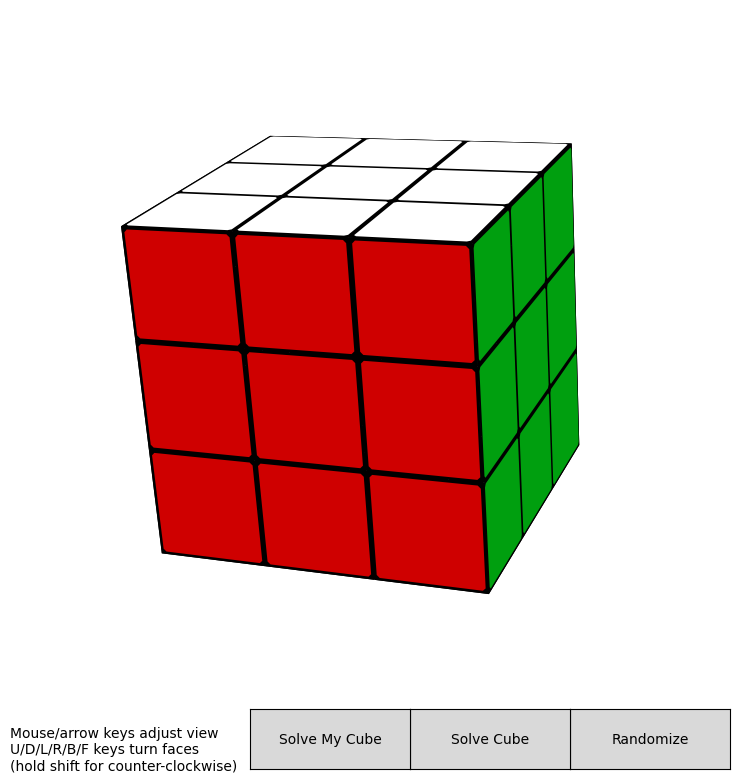

In [33]:
env2.fig

In [34]:
env2.sim_cube

In [35]:
isSolved(env2.sim_cube)

True

In [36]:
env2.sim_cube.perform_step("U")

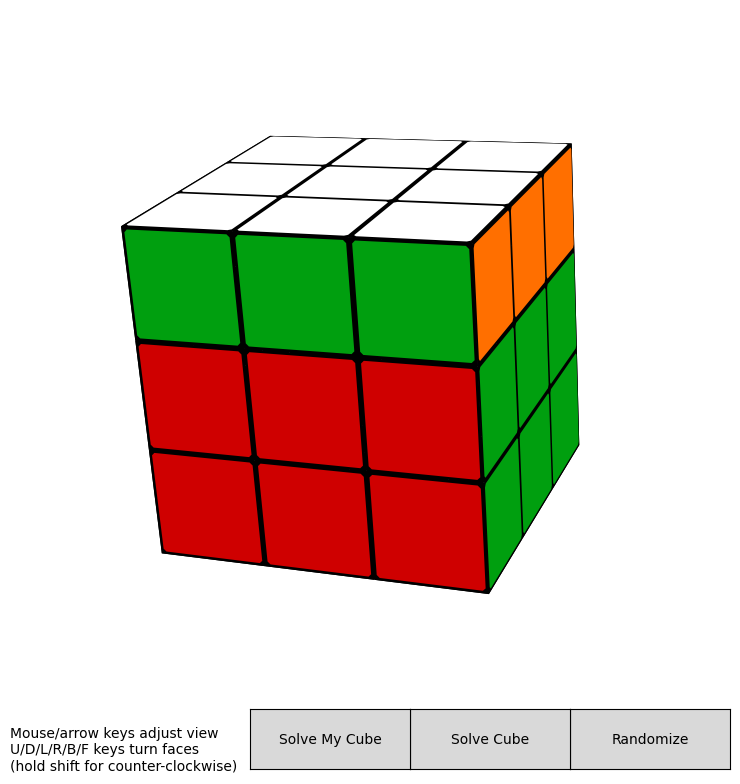

In [37]:
action = 0
face, degree = env.action_to_sim_action['render'][action]
env2.fig.axes[3].rotate_face(face, degree, layer = 0)
env2.fig

In [38]:
isSolved(env2.sim_cube)

False

In [39]:
env2.init_state()
env2.sim_cube.perform_step("U")
for action in range(env2.action_dim):
    # print("########################################")
    print(env2.sim_cube)
    sim_action = env2.action_to_sim_action[env2.cube_size][action]
    # next_sim_cube = env2.sim_cube.perform_step(sim_action)
    # print(next_sim_cube)
    if action % 2 == 0:
        counter_action = action + 1
    else:
        counter_action = action - 1
    if isSolved(env2.sim_cube.perform_step(sim_action)):
        reward = 1.0
        target_value, target_policy = 1.0, action
        print("Solved!")
        print(env2.sim_cube)
        print(env2.action_to_sim_action[env2.cube_size][counter_action])
        break
    else:
        reward = -1.0
    env2.sim_cube.perform_step(env2.action_to_sim_action[env2.cube_size][counter_action])
    
    # if isSolved_(next_sim_cube) == 1:
    

<Figure size 800x800 with 0 Axes>

         [y][y][y]
         [y][y][y]
         [y][y][y]
[g][g][g][o][o][o][b][b][b][r][r][r]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]

         [y][y][y]
         [y][y][y]
         [y][y][y]
[g][g][g][o][o][o][b][b][b][r][r][r]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]

Solved!
         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]

U


In [61]:
env3 = make_env('cpu', 3)

In [62]:
env3.show_cube = True

In [63]:
env3.sim_cube

In [64]:
import copy

In [65]:
state = env3.sim_state_to_state(env3.sim_cube)

In [66]:
env3.sim_cube.perform_step("U")

In [67]:
next_state = env3.sim_state_to_state(env3.sim_cube)

In [68]:
env3.sim_cube

In [60]:
state == next_state

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,

In [23]:
next_cube = env3.sim_cube.perform_step("U")

In [24]:
env3.sim_cube

In [25]:
next_cube

In [26]:
if next_cube.D == [[Square(next_cube["D"].colour)] * 3] * 3:
    for face in "LFRB":
        if next_cube.get_face(face)[:] != [[Square(next_cube[face].colour)] * 3] * 3:
            print("Not Solved!")

Not Solved!
Not Solved!
Not Solved!
Not Solved!


In [27]:
next_cube.perform_step("U'")

In [28]:
if next_cube.D == [[Square(next_cube["D"].colour)] * 3] * 3:
    for face in "LFRB":
        if next_cube.get_face(face)[:] != [[Square(next_cube[face].colour)] * 3] * 3:
            print("Not Solved!")
else:
    print("Not Solved!")